In [3]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

from pysoinn import util
from pysoinn import soinn_regression
from pysoinn.predictors import kNNDistanceWeightedRegressor

from matplotlib import pyplot as plt
%matplotlib inline

#in_dir = '/Users/shuchendu/Desktop/toppan/vectorized'
in_dir = 'D:\\Toppan\\2017-11-20 全データ\\処理済(総量)\\vectorized_keikaku_shibata'
files = [f for f in os.listdir(in_dir)]

# train and test data
#train_month_file, test_month_file = '201801010800.xlsx', '201802010800.xlsx'
train_month_file, test_month_file = '201701010800.xlsx', '201702010800.xlsx'

In [18]:
def pred_energy(energy, train_month_file, test_month_file):

    # read data from file
    train_df = pd.read_excel(os.path.join(in_dir, train_month_file), sheet_name=energy).values
    test_df = pd.read_excel(os.path.join(in_dir, test_month_file), sheet_name=energy).values
    
    # split to x and y
    train_x, train_y = train_df[:-1, :-1], train_df[1:, -1].reshape(-1, 1)
    test_x, test_y = test_df[:-1, :-1], test_df[1:, -1].reshape(-1, 1)
    
    # normalize
    x_ss, y_ss = StandardScaler(), StandardScaler()
    train_x, train_y = x_ss.fit_transform(train_x), y_ss.fit_transform(train_y)
    
    # concat x and y
    train_df = np.hstack((train_x, train_y))
    test_df = np.hstack((test_x, test_y))
    
    # model 
    dtr = soinn_regression.SoiamRegression(
                                node_delete_interval=5000, 
                                max_edge_age=5000, 
                                predictor=kNNDistanceWeightedRegressor(n_neighbors=3), 
                                shuffle=True)
    
    # fit
    dtr.fit(train_df[:, :-1], train_df[:, -1])
    
    # predict
    pred_dtr = []
    for test_x in test_df[:, :-1]:
        test_x = x_ss.transform(test_x.reshape(1, -1))
        pred_y = y_ss.inverse_transform(dtr.predict(test_x))
        
        pred_dtr.append(pred_y)

    # plot
    plt.figure(figsize=(20, 8))

    plt.plot(pred_dtr, label='pred')
    plt.plot(test_df[:, -1], label='true')
    
    #plt.plot(pred_dtr - test_df[:, -1].ravel(), label='diff')
    
    print('mse: ', mean_squared_error(pred_dtr, test_df[:, -1]))
    
    plt.legend()

mse:  11.19686390463415


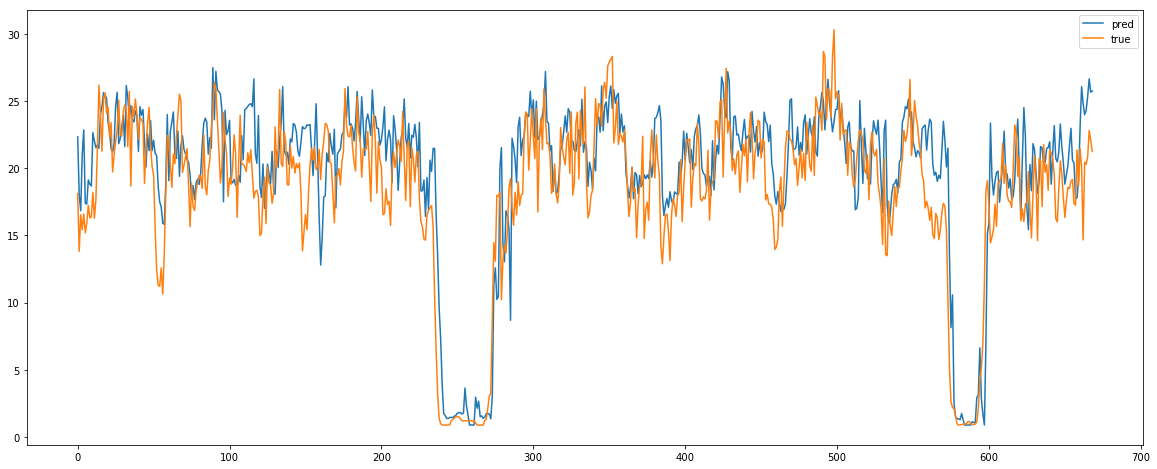

In [23]:
pred_energy('蒸気', train_month_file, test_month_file)

mse:  4.2510675958355435


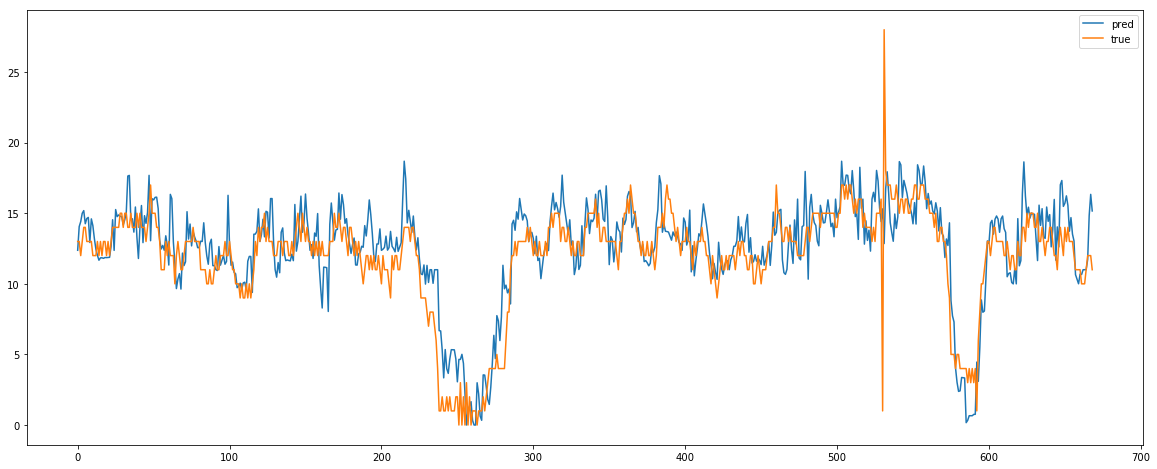

In [20]:
pred_energy('冷水', train_month_file, test_month_file)

mse:  321326.241895108


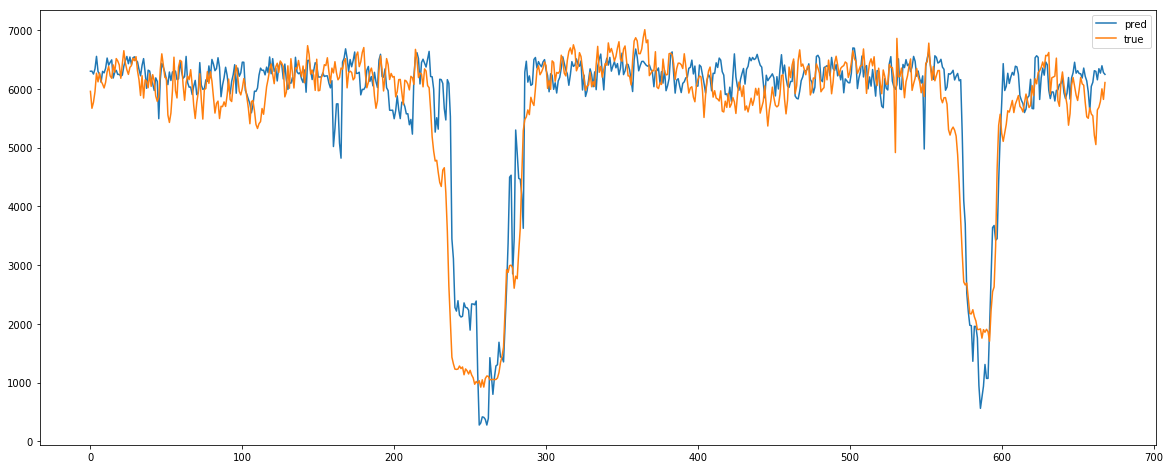

In [22]:
pred_energy('電力', train_month_file, test_month_file)